# Python Tutorial on FEM for 2D Truss

This python notebook will demonstrate on how to implement finite element method applied to two-dimensional truss structures. The detailed explanation of the procedure will be delivered during the class session.

We will again use `numpy` module in order to access the linear algebra or matrix capabilities of this python module. Additionally, two other modules will be used, namely, `math` and `matplotlib`.

The `math` module will be used to access more advance mathematical functions and operations.See [Python Math module](https://docs.python.org/3/library/math.html) for further information.

Additionally, the `matplotlib` module will used to access advance plotting capabilities. See [Matlplotlib](https://matplotlib.org/) for documentation. It is noted that there are a lot of functionalities in `matplotlib` but we will only using `pyplot` functions. Thus, it is imported as
```
import numpy as np
import math
import matplotlib.pyplot as plt
```

The following modules are imported.

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.collections as mc

# This line included just control the number of decimals in the output
np.set_printoptions(precision=4)

# Problem statement

This python notebook will solve the two dimensional truss structure shown below.
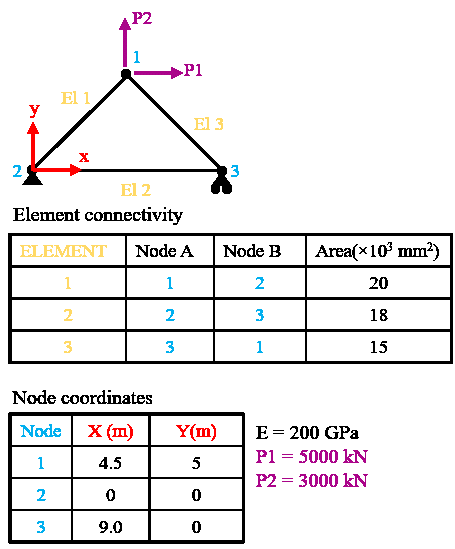

# FEM solution procedure

The FEM procedure to the problem stated above is very the same with the traditional direct stiffness method. As a preliminaries, we will define the base units first.

## Define Base Units
The base units should be defined first. This will help on the readability of the python code you will use. For example `P = 10*N` means a 10 Newton force. If the base units of force is set to Newton, then the output force will also be in Newton. The transformation/conversion can also be explicitly define. See code below.


In [4]:
# define base units
N = 1.0 # Forces: Newton
m = 1.0 # Length: meters

mm = 0.001*m
kN = 1000*N
MPa = N/mm**2
GPa = 1000*MPa

## **STEP 1**: Discretize the entire the structure

The process of discretization is basically subdividing the entire problem domain (or structure) into smaller elements by defining the (a) elements (b) nodes and (c) how the elements are connected to the nodes.

This procedure is very the same to the procedure discussed in the previous Python notebook [Stiffness method applied to springs](https://colab.research.google.com/drive/1rdwTeOGwCPxIFPbqozDXuEFMii7bIk45?usp=drive_link).

We will first define the coordinates of the nodes (see nodes table above). The data will be save in a `numpy.array` with variable name `nodes`. It will implemented as follows:

In [5]:
# define nodes using coordinate given
nodes = np.array([[4.5*m, 5.0*m],
                  [0.0*m, 0.0*m],
                  [9.0*m, 0.0*m]])

The next step is to define the node-element connectivity as described in the problem statement. Again, `numpy.array` will be used to store this information. Take note that the element numbering or indexing starts with `0` to be consistent with python.

In [6]:
# define element connectivity
# NOTE: index in python starts with 0
elems = np.array([[0,1],
                  [1,2],
                  [2,0]])

As part of the definition of the problem, we will also define the 'material' and 'sectional' properties of each element.

The material property that is needed to define the stiffness matrix later on is the Modulus of Elasticity of the material.

The sectional property needed for truss structures will be the area of each member. The information of this given in the problem statement.

In [10]:
# define area of each member
area = np.zeros((3,1) ) # initializtion
area[0] = (20*10**3)*mm**2
area[1] = (18*10**3)*mm**2
area[2] = (15*10**3)*mm**2

# define modulus of elasticity
Emod = np.zeros((3,1) ) # initializtion
Emod[0] = 200.*GPa
Emod[1] = 200.*GPa
Emod[2] = 200.*GPa

Whenever possible, visualize the model to check the connectivity and dimensions are correct. You should check the model before actual analysis is done. The `matplotlib` functions are used here.

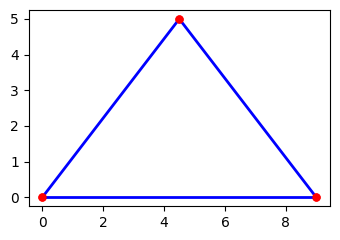

In [11]:
n_elems = elems.shape[0]

plt.figure(figsize=(3.5,2.5) )

for i in range(n_elems ):
  x1 , y1 = nodes[elems[i,0]-1,0] , nodes[elems[i,1]-1,0]
  x2 , y2 = nodes[elems[i,0]-1,1] , nodes[elems[i,1]-1,1]
  plt.plot([x1,y1],[x2,y2],linewidth=2,color='b',marker=".",
           markersize=10,markeredgecolor='r',markerfacecolor='r')

plt.tight_layout()

## **STEP 2**: Describe element behavior

The next step this procedure is to define the 'behavior' of the element. This means that the force-displacement relations in the element level should be defined properly. More specifically, the element stiffness matrix should be calculated.

Since the element stiffness matrix is easily derived using the local coordinates system, a need for 'transformation' from the local coordinates to the global coordinates system is needed.

A simple ilustration is provided below.

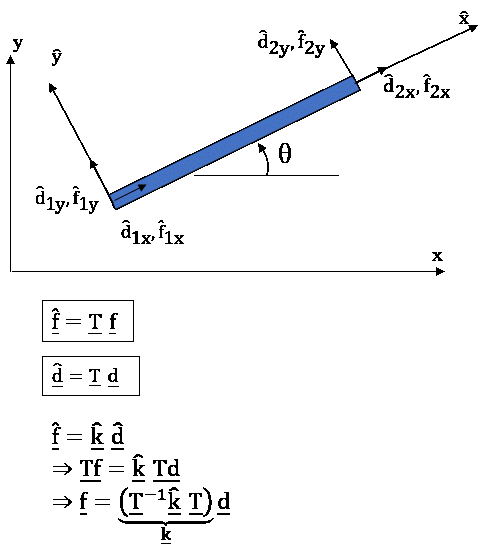


A transformation matrix $T$ can be used and multiplied to the element stiffness matrix $\hat{k}$ (in local coordinates).

The $i$th element stiffness matrix in global coordinates, $k_i$, can be calculated as $k_i = T^T \hat{k} T$.

The following matrices are defined below.

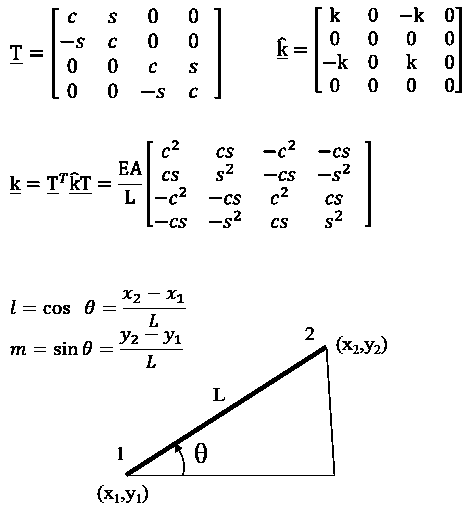

In [12]:
# determine nodes associated with Element 1
elem_i  = 0                   # member 1, python index starts with 0
elnodes = elems[elem_i,:]     # get the nodes associated with element 1
nodexy  = nodes[elnodes,:]    # get the nodes coordinates associated with nodes of element 1

# determine the length of Element 1
L = np.linalg.norm([nodexy[1,0]-nodexy[0,0],
                    nodexy[1,1]-nodexy[0,1]])   # length = sqrt((x1-x2)^2+(y1-y2)^2)

# define local stiffness matrix
k_hat = np.array([[ 1,0,-1,0],
                  [ 0,0, 0,0],
                  [-1,0, 1,0],
                  [ 0,0, 0,0]]) * (Emod[elem_i]*area[elem_i]/L)
print(f'The element stiffness matrix in local coord or k_hat of element-{elem_i+1} is:\n {k_hat}')

# calculate direction cosines
c = (nodexy[1,0]-nodexy[0,0])/L # cos theta
s = (nodexy[1,1]-nodexy[0,1])/L # sin theta

# define rotation matrix T
T = np.array([[ c,s, 0,0],
              [-s,c, 0,0],
              [ 0,0, c,s],
              [ 0,0,-s,c]])

k_1 = np.dot(np.dot(T.T , k_hat),T)
print(f'The element stiffness matrix in global coordinates of element-{elem_i+1} is:\n {k_1}')

The element stiffness matrix in local coord or k_hat of element-1 is:
 [[ 5.9464e+08  0.0000e+00 -5.9464e+08  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [-5.9464e+08  0.0000e+00  5.9464e+08  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]]
The element stiffness matrix in global coordinates of element-1 is:
 [[ 2.6611e+08  2.9568e+08 -2.6611e+08 -2.9568e+08]
 [ 2.9568e+08  3.2853e+08 -2.9568e+08 -3.2853e+08]
 [-2.6611e+08 -2.9568e+08  2.6611e+08  2.9568e+08]
 [-2.9568e+08 -3.2853e+08  2.9568e+08  3.2853e+08]]


A more efficient way of defining or deriving the element stiffness matrix is thru 'iterating' to each element by changing the value of `elem_i` to all elements. The `for` loop can be used for this purpose.

In [13]:

for elem_i in range(n_elems ):

  # determine nodes associated with Element 1
  elnodes = elems[elem_i,:]     # get the nodes associated with element 1
  nodexy  = nodes[elnodes,:]    # get the nodes coordinates associated with nodes of element 1

  # determine the length of Element 1
  L = np.linalg.norm([nodexy[1,0]-nodexy[0,0],
                      nodexy[1,1]-nodexy[0,1]])   # length = sqrt((x1-x2)^2+(y1-y2)^2)

  # define local stiffness matrix
  k_hat = np.array([[ 1,0,-1,0],
                    [ 0,0, 0,0],
                    [-1,0, 1,0],
                    [ 0,0, 0,0]]) * (Emod[elem_i]*area[elem_i]/L)

  # calculate direction cosines
  c = (nodexy[1,0]-nodexy[0,0])/L # cos theta
  s = (nodexy[1,1]-nodexy[0,1])/L # sin theta

  # define rotation matrix T
  T = np.array([[ c,s, 0,0],
                [-s,c, 0,0],
                [ 0,0, c,s],
                [ 0,0,-s,c]])

  k = np.dot(np.dot(T.T , k_hat),T)
  print(f'The element stiffness matrix in global coordinates of element-{elem_i+1} is:\n {k}')

The element stiffness matrix in global coordinates of element-1 is:
 [[ 2.6611e+08  2.9568e+08 -2.6611e+08 -2.9568e+08]
 [ 2.9568e+08  3.2853e+08 -2.9568e+08 -3.2853e+08]
 [-2.6611e+08 -2.9568e+08  2.6611e+08  2.9568e+08]
 [-2.9568e+08 -3.2853e+08  2.9568e+08  3.2853e+08]]
The element stiffness matrix in global coordinates of element-2 is:
 [[ 4.e+08  0.e+00 -4.e+08  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00]
 [-4.e+08  0.e+00  4.e+08  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00]]
The element stiffness matrix in global coordinates of element-3 is:
 [[ 1.9958e+08 -2.2176e+08 -1.9958e+08  2.2176e+08]
 [-2.2176e+08  2.4640e+08  2.2176e+08 -2.4640e+08]
 [-1.9958e+08  2.2176e+08  1.9958e+08 -2.2176e+08]
 [ 2.2176e+08 -2.4640e+08 -2.2176e+08  2.4640e+08]]


## **STEP 3**: Describe global structural behavior

Similar to the previous python notebook regarding stiffness method, the next step is to describe the global behavior. Basically, the force-displacement relations for the entire structure should be established based on the element behaviors or the element stiffnesses. The global stiffness matrix of the structure should be determine by the process of so-called 'assembly'.

Nodal Degrees of Freedom

The concept of DOFs is first described. The DOF is dependent on the element type that is considered and whether the structure is analysed in 2D or 3D. For the example, a planar truss is considered which will have 4 DOFs per element.

NOTE: The notation or naming of DOFs is arbitrary (meaning you can choose however you want it to be named). There different algorithms that can be used to name these DOFs.

The number of global DOFs will be $2 \times no.\:of\:nodes$

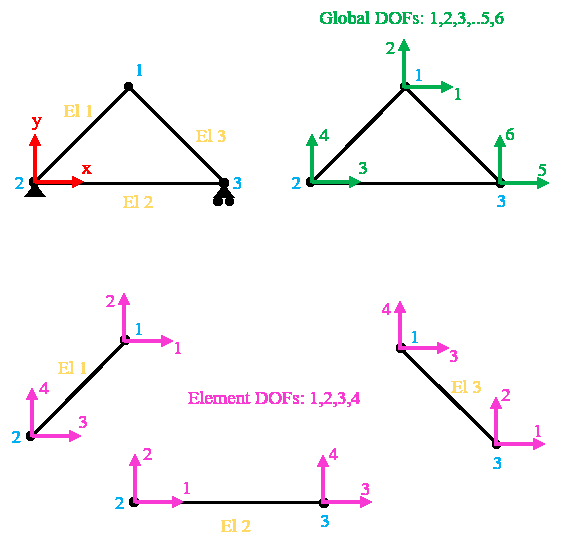

In [14]:
Nnodes = nodes.shape[0]
alldofs = np.arange(0,2*Nnodes) # python indexing starts with 0
print(alldofs)

[0 1 2 3 4 5]


In [15]:
K_g = np.zeros((2*Nnodes,2*Nnodes) ) # initialize the global stiffness matrix

elem_i  = 0
elnodes = elems[elem_i,:]

# determine the corresponding global DOFs
eldofs = np.array([2*elnodes[0],2*elnodes[0]+1,
                   2*elnodes[1],2*elnodes[1]+1])

print(eldofs)
K_g[np.ix_(eldofs,eldofs)] = K_g[np.ix_(eldofs,eldofs)] + k_1

print(f'The global stiffness matrix after adding k_hat of elem-1:\n {K_g}')

[0 1 2 3]
The global stiffness matrix after adding k_hat of elem-1:
 [[ 2.6611e+08  2.9568e+08 -2.6611e+08 -2.9568e+08  0.0000e+00  0.0000e+00]
 [ 2.9568e+08  3.2853e+08 -2.9568e+08 -3.2853e+08  0.0000e+00  0.0000e+00]
 [-2.6611e+08 -2.9568e+08  2.6611e+08  2.9568e+08  0.0000e+00  0.0000e+00]
 [-2.9568e+08 -3.2853e+08  2.9568e+08  3.2853e+08  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]]


In [16]:
K_g = np.zeros((2*Nnodes,2*Nnodes) ) # initialize the global stiffness matrix

for elem_i in range(n_elems ):

  print(f'Iteration for Element: {elem_i+1}:\n')

  # determine nodes associated with Element 1
  elnodes = elems[elem_i,:]     # get the nodes associated with element 1
  nodexy  = nodes[elnodes,:]    # get the nodes coordinates associated with nodes of element 1

  # determine the length of Element 1
  L = np.linalg.norm([nodexy[1,0]-nodexy[0,0],
                      nodexy[1,1]-nodexy[0,1]])   # length = sqrt((x1-x2)^2+(y1-y2)^2)

  # define local stiffness matrix
  k_hat = np.array([[ 1,0,-1,0],
                    [ 0,0, 0,0],
                    [-1,0, 1,0],
                    [ 0,0, 0,0]]) * (Emod[elem_i]*area[elem_i]/L)

  # calculate direction cosines
  c = (nodexy[1,0]-nodexy[0,0])/L # cos theta
  s = (nodexy[1,1]-nodexy[0,1])/L # sin theta

  # define rotation matrix T
  T = np.array([[ c,s, 0,0],
                [-s,c, 0,0],
                [ 0,0, c,s],
                [ 0,0,-s,c]])

  k = np.dot(np.dot(T.T , k_hat),T)
  print(f'The element stiffness matrix:\n {k}')

  # determine the corresponding global DOFs
  eldofs = np.array([2*elnodes[0],2*elnodes[0]+1,
                     2*elnodes[1],2*elnodes[1]+1])

  K_g[np.ix_(eldofs,eldofs)] = K_g[np.ix_(eldofs,eldofs)] + k

  print(f'The global stiffness matrix after adding k_hat\n {K_g}\n\n')


Iteration for Element: 1:

The element stiffness matrix:
 [[ 2.6611e+08  2.9568e+08 -2.6611e+08 -2.9568e+08]
 [ 2.9568e+08  3.2853e+08 -2.9568e+08 -3.2853e+08]
 [-2.6611e+08 -2.9568e+08  2.6611e+08  2.9568e+08]
 [-2.9568e+08 -3.2853e+08  2.9568e+08  3.2853e+08]]
The global stiffness matrix after adding k_hat
 [[ 2.6611e+08  2.9568e+08 -2.6611e+08 -2.9568e+08  0.0000e+00  0.0000e+00]
 [ 2.9568e+08  3.2853e+08 -2.9568e+08 -3.2853e+08  0.0000e+00  0.0000e+00]
 [-2.6611e+08 -2.9568e+08  2.6611e+08  2.9568e+08  0.0000e+00  0.0000e+00]
 [-2.9568e+08 -3.2853e+08  2.9568e+08  3.2853e+08  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]]


Iteration for Element: 2:

The element stiffness matrix:
 [[ 4.e+08  0.e+00 -4.e+08  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00]
 [-4.e+08  0.e+00  4.e+08  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00]]
The global stiffness matrix after add

In [17]:
bc = np.array([[1,0,0],
               [1,1,0],
               [2,1,0]])

n_bc = bc.shape[0]
print(n_bc )

3


In [18]:
# initialize nodal displacement vector
u = np.zeros([2*Nnodes,1])

# determine index of specified dof
dofspec = []
for i in range(n_bc):
  thisdof = 2*(bc[i,0]) + bc[i,1]
  dofspec.append(thisdof)
  u[thisdof] = bc[i,2] # specify given displacement

# convert list to numpy array
dofspec = np.array(dofspec).astype(int)

print(dofspec)
print(u)

[2 3 5]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [19]:
# determine index of free dof
doffree = alldofs
doffree = np.array(doffree)
doffree = np.delete(doffree, dofspec, axis=0)

print(doffree)

[0 1 4]


In [20]:
P1 =  3000*kN
P2 = -5000*kN
loads = np.array([[0,0,P1],
                  [0,1,P2]])

# define force vector
f = np.zeros((2*Nnodes,1) )

n_loads = loads.shape[0]
for i in range(n_loads):
  f[int(2*loads[i,0]+loads[i,1])] = loads[i,2]

print(f)

[[ 3000000.]
 [-5000000.]
 [       0.]
 [       0.]
 [       0.]
 [       0.]]


In [21]:
A = K_g[np.ix_(doffree,doffree)]
b = f[np.ix_(doffree)] - np.dot(K_g[np.ix_(doffree,dofspec)],u[np.ix_(dofspec)])
u[np.ix_(doffree)] = np.linalg.solve(A,b);

print(f'The nodal displacements: \n{u}\n')

The nodal displacements: 
[[ 0.0127]
 [-0.0139]
 [ 0.    ]
 [ 0.    ]
 [ 0.0094]
 [ 0.    ]]



In [ ]:
def Plot2DTruss(nodes,elems,c,lt,lw,lg):
    for i in range (len(elems)):
        xi, xf = nodes[elems[i,0],0] , nodes[elems[i,1],0]
        yi, yf = nodes[elems[i,0],1] , nodes[elems[i,1],1]
        line, = plt.plot([xi,xf],[yi,yf], marker='o',color = c, linestyle = lt, linewidth = lw )
    line.set_label(lg)
    plt.legend(prop = {'size':8})

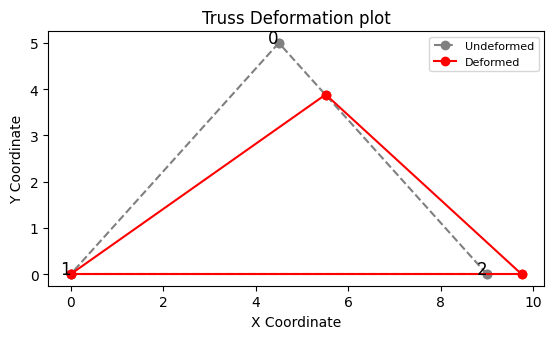

In [ ]:
Nnodes = nodes.shape[0]
u_deformed = np.zeros([Nnodes,2])
for i in range(Nnodes):
    u_deformed[i,0] = u[2*i,0]
    u_deformed[i,1] = u[2*i+1,0]

scale = 80
deformed_nodes = u_deformed*scale + nodes


fig, ax = plt.subplots()

ax.autoscale()
ax.set_aspect('equal')

Plot2DTruss(nodes,elems,'gray','--',1.5,'Undeformed')
Plot2DTruss(deformed_nodes,elems,'red','-',1.5,'Deformed')

# Annotate nodes
for i, (x, y) in enumerate(nodes):
    ax.text(x, y, str(i), fontsize=12, ha='right', color='black')

plt.title("Truss Deformation plot")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()



In [ ]:
stress = np.zeros((n_elems,1))
for elem_i in range(n_elems ):

  # determine nodes associated with Element 1
  elnodes = elems[elem_i,:]     # get the nodes associated with element 1
  nodexy  = nodes[elnodes,:]    # get the nodes coordinates associated with nodes of element 1

  # determine the corresponding global DOFs
  eldofs = np.array([2*elnodes[0],2*elnodes[0]+1,
                     2*elnodes[1],2*elnodes[1]+1])
  d_elem = u[eldofs]

  # calculate direction cosines
  c = (nodexy[1,0]-nodexy[0,0])/L # cos theta
  s = (nodexy[1,1]-nodexy[0,1])/L # sin theta

  # determine the length of Element 1
  L = np.linalg.norm([nodexy[1,0]-nodexy[0,0],
                      nodexy[1,1]-nodexy[0,1]])   # length = sqrt((x1-x2)^2+(y1-y2)^2)

  sigma = (np.array([-c,-s,c,s]) @ d_elem)*Emod[elem_i]*area[elem_i]/L

  stress[elem_i] = sigma / 1e6 # convert to MPa


In [ ]:
def Plot2DTrussStress(nodes,stress,elements):

  fig, ax = plt.subplots()

  stress = stress.flatten()

  # Normalize stress for color mapping
  stress_min, stress_max = min(stress), max(stress)
  colors = [(s - stress_min) / (stress_max - stress_min) for s in stress]

  # Create line segments for plotting
  lines = [(nodes[i], nodes[j]) for i, j in elements]
  lc = mc.LineCollection(lines, cmap='coolwarm', linewidths=3,
                         array=stress, norm=plt.Normalize(vmin=stress_min,
                                                          vmax=stress_max))
  # Plot lines/elements
  ax.add_collection(lc)

  # Plot nodes
  ax.scatter(nodes[:, 0], nodes[:, 1], color='black', zorder=3)

  # Annotate nodes
  for i, (x, y) in enumerate(nodes):
      ax.text(x, y, str(i), fontsize=12, va='top', color='black')

  # Color bar for stress values
  cb = plt.colorbar(lc, ax=ax)
  cb.set_label("Stress (MPa)")

  plt.title("Truss Stress Distribution")
  plt.xlabel("X Coordinate")
  plt.ylabel("Y Coordinate")

  ax.autoscale()
  ax.set_aspect('equal')

  plt.show()

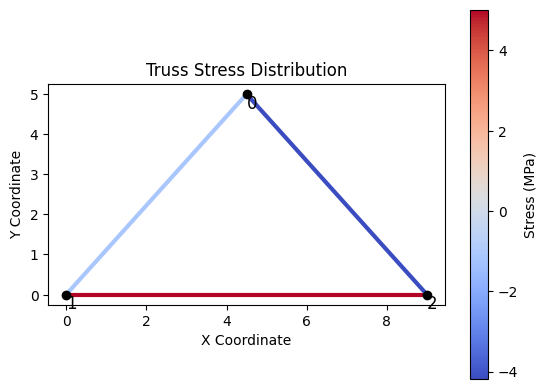

In [ ]:
Plot2DTrussStress(nodes,stress,elems)